# Fitting a Good Model

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
class_data = pd.read_csv('transformed_diabetes_data.csv')
class_data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,age_buckets_thirties,age_buckets_40plus,outcome
0,0.763721,0.852119,-0.032998,0.671091,0.416780,0.269082,0.761343,1.362563,0,1,1.0
1,-0.708481,-1.207994,-0.527280,0.073180,-1.296968,-0.831240,-0.141270,0.113269,1,0,0.0
2,1.148595,1.996626,-0.692041,-0.271203,0.371574,-1.455115,0.869179,0.217510,1,0,1.0
3,-0.708481,-1.077194,-0.527280,-0.590521,-0.557812,-0.572858,-1.296906,-1.494139,0,0,0.0
4,-1.724150,0.492416,-2.669169,0.671091,0.406599,1.441855,2.775306,0.315239,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
747,1.487677,-0.684791,0.296524,1.810934,0.525368,0.169921,-1.260081,1.770583,0,1,0.0
748,-0.287777,0.001913,-0.197758,-0.139684,0.375728,0.697558,-0.190808,-0.383463,0,0,0.0
749,0.546955,-0.030787,-0.032998,-0.590521,-0.273396,-0.902605,-0.700624,0.001855,0,0,0.0
750,-0.708481,0.132714,-1.021562,0.690100,0.026093,-0.249020,-0.150160,1.234748,0,1,1.0


In [3]:
class_data['outcome'] = class_data['outcome'].astype('category')

In [83]:
reg_data = pd.read_csv('ds_salaries.csv').drop(columns='salary')
reg_data

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,USD,150000,US,100,US,M


## Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [84]:
class_train, class_test = train_test_split(class_data, train_size=0.8, random_state=1)
reg_train, reg_test = train_test_split(reg_data, train_size=0.8, random_state=1)

## Start with a Baseline

You always want to start with baseline. In the real world, we can calculate accuracy and RMSE and whatever metrics we want, but those numbers are often meaningless. If a model has 66% recall, is that good? We don't know. We don't even know if 100% is good; we can always set recall to 100% by predicting the positive class every time. What we need is some number, some metric, to compare the other metrics to. That's what the baseline does.

A baseline is a simple model that gives us something to compare our other models to.

### Designing a Baseline

There are quite a few ways to create a meaningful baseline, and the best option depends on your dataset and what you really want from that dataset. But there a few common baselines that come up over and over again.

### Classification Baselines

A **classification** problem is where you're trying to decide which *class*, or *group*, each observation belongs to. The output is *categorical*. There are a few common baselines for this type of problem.

* **Majority Class Baseline** - Predict that every observation is in the most common category. This baseline is commonly used when the classes are highly imbalanced. A highly imbalanced dataset can have metrics that look *VERY GOOD* using this baseline. That makes the baseline especially hard to improve upon.
* **Uniform Random Baseline** - Randomly assign each observation to a group, with each group equally likely. This baseline secretly makes the assumption that there is no useful information in the data. Since we have no information that might help us predict which class each observation falls into, we just guess randomly. This baseline is helpful when you're not sure if there's any hope of actually making good predictions, like when you're prototyping a completely new idea.
* **Proportional Random Baseline** - Randomly assign each observation to a group, with probability determined by the proportion in the training data. This baseline is similar to the **uniform random baseline**, but says that the proportions of each class in the training set is informative. The two baselines are exactly the same when the classes all have the same number of observations. 
* **Constant Baseline** - Predict that every observation is whatever class you want. This baseline is more helpful for estimating the business impact of certain predictions than it is for fitting a good model. If the business is best helped by simply predicting a constant value, then there's no point in fitting a model at all. For example, if a telecom company will make more money by giving every customer a $10 discount than by targeting certain customers, then why bother making a churn model? 

### Majority Class Baseline

In [21]:
# baselines_df
class_baselines_df = pd.DataFrame()

# by hand
class_baselines_df['majority_class_hand'] = [class_train['outcome'].mode().values[0]] * class_test.shape[0]

# via sklearn
from sklearn.dummy import DummyClassifier
majority_class_model = DummyClassifier(strategy='most_frequent')
majority_class_model.fit(class_train.drop(columns='outcome'), class_train['outcome'])
class_baselines_df['majority_class_sklearn'] = majority_class_model.predict(class_test.drop(columns='outcome'))

### Uniform Random Baseline

In [26]:
# by hand
class_baselines_df['uniform_random_hand'] = np.random.choice(class_train['outcome'].unique(), 
                                                             size=class_test.shape[0])

# via sklearn
uniform_random_model = DummyClassifier(strategy='uniform')
uniform_random_model.fit(class_train.drop(columns='outcome'), class_train['outcome'])
class_baselines_df['uniform_random_sklearn'] = uniform_random_model.predict(class_test.drop(columns='outcome'))

### Proportional Random Baseline

In [29]:
# by hand
outcome_proportions = class_train['outcome'].value_counts() / class_train.shape[0]
class_baselines_df['proportional_random_hand'] = np.random.choice(outcome_proportions.index,
                                                                  size=class_test.shape[0],
                                                                  p=outcome_proportions)

# via sklearn
proportional_random_model = DummyClassifier(strategy='stratified')
proportional_random_model.fit(class_train.drop(columns='outcome'), class_train['outcome'])
class_baselines_df['proportional_random_sklearn'] = proportional_random_model.predict(class_test.drop(columns='outcome'))

### Constant Baseline

In [31]:
# by hand
class_baselines_df['constant_0_hand'] = 0
class_baselines_df['constant_1_hand'] = 1

# via sklearn
constant0_model = DummyClassifier(strategy='constant', constant=0)
constant0_model.fit(class_train.drop(columns='outcome'), class_train['outcome'])
class_baselines_df['constant_0_sklearn'] = constant0_model.predict(class_test.drop(columns=['outcome']))

constant1_model = DummyClassifier(strategy='constant', constant=1)
constant1_model.fit(class_train.drop(columns='outcome'), class_train['outcome'])
class_baselines_df['constant_1_sklearn'] = constant1_model.predict(class_test.drop(columns=['outcome']))

### Examine Baselines

In [38]:
baselines = pd.concat([(class_baselines_df[v].value_counts() / class_baselines_df.shape[0])*100 for v in class_baselines_df.columns], axis=1)
baselines.columns = class_baselines_df.columns
baselines['original'] = (class_train['outcome'].value_counts() / class_train.shape[0]) * 100
baselines.T

,0.0,1.0
majority_class_hand,100.000000,NaN
majority_class_sklearn,100.000000,NaN
uniform_random_hand,46.357616,53.642384
uniform_random_sklearn,52.980132,47.019868
proportional_random_hand,74.834437,25.165563
proportional_random_sklearn,68.874172,31.125828
constant_0_hand,100.000000,NaN
constant_1_hand,NaN,100.000000
constant_0_sklearn,100.000000,NaN
constant_1_sklearn,NaN,100.000000


## Using a Baseline

A baseline gives you something to compare your model to. Once you've got a baseline (or more than one!), you fit a model and then calculate metrics on both your fitted model and the baseline(s). Hopefully your model is like a lot better than the baseline.

In [39]:
# try a random forest
from sklearn.ensemble import RandomForestClassifier

In [40]:
# fit the model
rfc = RandomForestClassifier()
rfc.fit(class_train.drop(columns='outcome'), class_train['outcome'])
class_baselines_df['randomforestclassifier'] = rfc.predict(class_test.drop(columns='outcome'))

In [78]:
# import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

In [70]:
# compare metrics between baselines and model
class_reports = {k:classification_report(class_test['outcome'], class_baselines_df[k]) for k in class_baselines_df.columns}

C:\Users\johnr\anaconda3\envs\bootcampweek1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\johnr\anaconda3\envs\bootcampweek1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\johnr\anaconda3\envs\bootcampweek1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [71]:
[print(k, '\n', v, '\n') for k, v in class_reports.items()]

majority_class_hand 
               precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       102
         1.0       0.00      0.00      0.00        49

    accuracy                           0.68       151
   macro avg       0.34      0.50      0.40       151
weighted avg       0.46      0.68      0.54       151
 

majority_class_sklearn 
               precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       102
         1.0       0.00      0.00      0.00        49

    accuracy                           0.68       151
   macro avg       0.34      0.50      0.40       151
weighted avg       0.46      0.68      0.54       151
 

uniform_random_hand 
               precision    recall  f1-score   support

         0.0       0.63      0.43      0.51       102
         1.0       0.28      0.47      0.35        49

    accuracy                           0.44       151
   macro avg       0.46      0.45      0.43       151
w

[None, None, None, None, None, None, None, None, None, None, None]

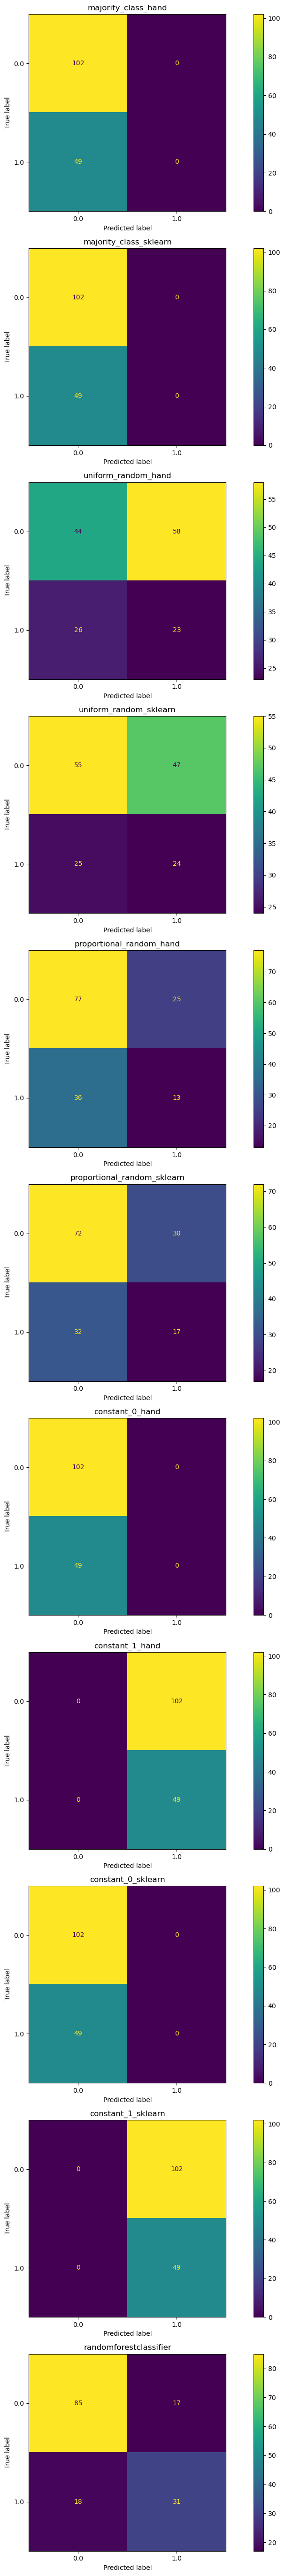

In [72]:
# confusion matrices
fig, ax = plt.subplots(nrows = class_baselines_df.shape[1], figsize=(12, 5*class_baselines_df.shape[1]))
for i, k in enumerate(class_baselines_df.columns):
    ConfusionMatrixDisplay.from_predictions(class_test['outcome'], class_baselines_df[k], ax=ax[i])
    ax[i].set_title(k)
fig.tight_layout();

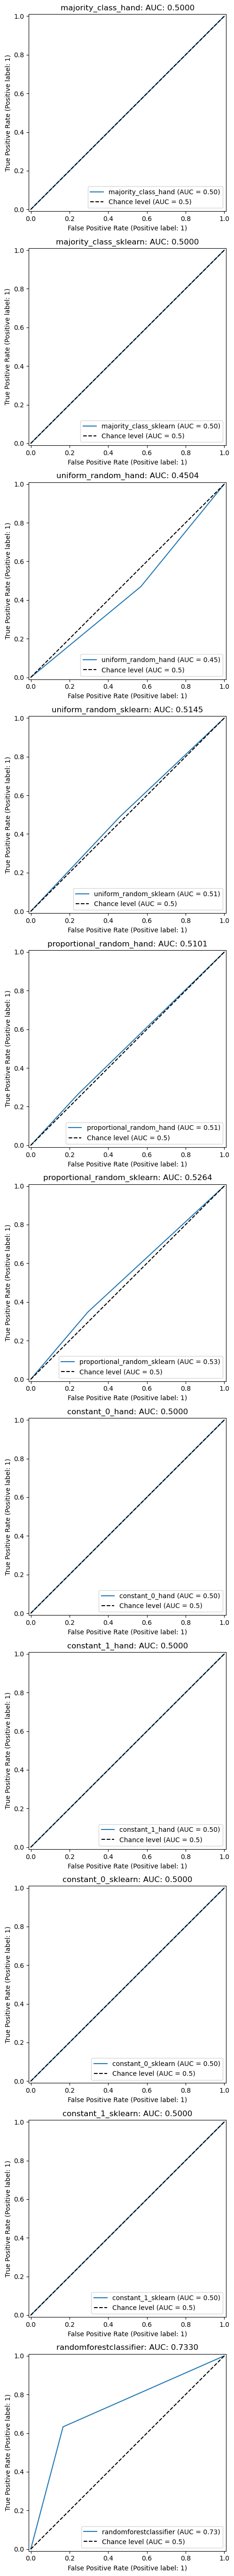

In [80]:
# roc_auc comparison
aucs = {k:roc_auc_score(class_test['outcome'], class_baselines_df[k]) for k in class_baselines_df.columns}
fig, ax = plt.subplots(nrows = class_baselines_df.shape[1], figsize=(12, 5*class_baselines_df.shape[1]))
for i, k in enumerate(class_baselines_df.columns):
    RocCurveDisplay.from_predictions(class_test['outcome'], class_baselines_df[k], 
                                     ax=ax[i], name=k, plot_chance_level=True)
    ax[i].set_title(f'{k}: AUC: {aucs[k]:.4f}')
fig.tight_layout();

## Regression Baselines

The use of baselines in **regression** is very similar to the use of baselines in **classification**, but of course the metrics are different. There are four baselines offered by sci-kit learn's **DummyRegressor** class.

* **Mean Baseline** - Predict the mean value of the target. Most often used when the target column is expected to be symmetrical.
* **Median Baseline** - Predict the median value of the target. Most often used when the target column may not be symmetrical.
* **Quantile Baseline** - Predict a certain quantile of the target. Can be used to evaluate the decision-making power of predictions, like the constant baselines for classification.
* **Constant Baseline** - Predict a constant value. Can be used to evaluate the decision-making power of predictions, like the constant baselines for classification.

In [86]:
reg_train.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Mean Baseline

In [87]:
# via sklearn
from sklearn.dummy import DummyRegressor
reg_baselines_df = pd.DataFrame()

mean_model = DummyRegressor(strategy='mean')
mean_model.fit(reg_train.drop(columns='salary_in_usd'), reg_train['salary_in_usd'])
reg_baselines_df['mean'] = mean_model.predict(reg_test.drop(columns='salary_in_usd'))

### Median Baseline

In [88]:
median_model = DummyRegressor(strategy='median')
median_model.fit(reg_train.drop(columns='salary_in_usd'), reg_train['salary_in_usd'])
reg_baselines_df['median'] = median_model.predict(reg_test.drop(columns='salary_in_usd'))

### Quantile Baseline

In [90]:
quantile_model = DummyRegressor(strategy='quantile', quantile=0.25)
quantile_model.fit(reg_train.drop(columns='salary_in_usd'), reg_train['salary_in_usd'])
reg_baselines_df['quantile'] = quantile_model.predict(reg_test.drop(columns='salary_in_usd'))

### Constant Baseline

In [91]:
constant_model = DummyRegressor(strategy='constant', constant=100000)
constant_model.fit(reg_train.drop(columns='salary_in_usd'), reg_train['salary_in_usd'])
reg_baselines_df['constant'] = constant_model.predict(reg_test.drop(columns='salary_in_usd'))

### More Interesting Regression Baselines

In [94]:
# sklearn's baselines are all constant!
reg_baselines_df.head()

,mean,median,quantile,constant
0,112523.268041,101570.0,62000.0,100000
1,112523.268041,101570.0,62000.0,100000
2,112523.268041,101570.0,62000.0,100000
3,112523.268041,101570.0,62000.0,100000
4,112523.268041,101570.0,62000.0,100000


Sci-kit Learn's **regression** baselines are all constant. However, we can make our own similar but more interesting baselines pretty easily. For example, instead of using the mean of the entire target column, we can group the data by a categorical column and then use the mean from each group!

In [120]:
# get the mean salary in USD by location as a baseline
mean_by_location = reg_train.groupby('company_location').mean(numeric_only=True)['salary_in_usd']
reg_baselines_df['mean_by_location'] = [mean_by_location[i] if i in mean_by_location.index else reg_train['salary_in_usd'].mean() for i in reg_test['company_location']]

# get the median salary in USD by experience level as a baseline
median_by_experience = reg_train.groupby('experience_level').median(numeric_only=True)['salary_in_usd']
reg_baselines_df['median_by_experience'] = [median_by_experience[i] if i in median_by_experience.index else reg_train['salary_in_usd'].median() for i in reg_test['experience_level']]

In [121]:
reg_baselines_df

,mean,median,quantile,constant,mean_by_location,median_by_experience
0,112523.268041,101570.0,62000.0,100000,81432.200000,58000.0
1,112523.268041,101570.0,62000.0,100000,49145.900000,78263.0
2,112523.268041,101570.0,62000.0,100000,144512.075862,78263.0
3,112523.268041,101570.0,62000.0,100000,81432.200000,135000.0
4,112523.268041,101570.0,62000.0,100000,49145.900000,171437.5
...,...,...,...,...,...,...
117,112523.268041,101570.0,62000.0,100000,81035.216216,135000.0
118,112523.268041,101570.0,62000.0,100000,144512.075862,135000.0
119,112523.268041,101570.0,62000.0,100000,144512.075862,135000.0
120,112523.268041,101570.0,62000.0,100000,144512.075862,58000.0


## Using a Baseline

In [123]:
# try a random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [124]:
# fit the model
encoder = OneHotEncoder(handle_unknown='infrequent_if_exist')
X_train = encoder.fit_transform(reg_train.drop(columns='salary_in_usd'))
y_train = reg_train['salary_in_usd']

reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

RandomForestRegressor()

In [139]:
# get predictions
X_test = encoder.transform(reg_test.drop(columns='salary_in_usd'))
y_test = reg_test['salary_in_usd']

y_pred = reg_model.predict(X_test)
reg_baselines_df['randomforest'] = y_pred

In [126]:
# import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, PredictionErrorDisplay
from scipy.stats import spearmanr

In [163]:
# make metrics df
reg_metrics_df = pd.DataFrame()

for col in reg_baselines_df.columns:
    reg_metrics_df.loc['r2_score', col] = r2_score(y_test, reg_baselines_df[col])
    reg_metrics_df.loc['correlation', col] = spearmanr(y_test, reg_baselines_df[col]).statistic
    reg_metrics_df.loc['mean_absolute_error', col] = mean_absolute_error(y_test, reg_baselines_df[col])
    reg_metrics_df.loc['mean_squared_error', col] = mean_squared_error(y_test, reg_baselines_df[col])
    reg_metrics_df.loc['root_mean_squared_error', col] = np.sqrt(reg_metrics_df.loc['mean_squared_error', col])
    reg_metrics_df.loc['max_error', col] = max_error(y_test, reg_baselines_df[col])

C:\Users\johnr\AppData\Local\Temp\ipykernel_35732\4068435897.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  reg_metrics_df.loc['correlation', col] = spearmanr(y_test, reg_baselines_df[col]).statistic
C:\Users\johnr\AppData\Local\Temp\ipykernel_35732\4068435897.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  reg_metrics_df.loc['correlation', col] = spearmanr(y_test, reg_baselines_df[col]).statistic
C:\Users\johnr\AppData\Local\Temp\ipykernel_35732\4068435897.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  reg_metrics_df.loc['correlation', col] = spearmanr(y_test, reg_baselines_df[col]).statistic
C:\Users\johnr\AppData\Local\Temp\ipykernel_35732\4068435897.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  reg_metrics_df.loc['correlation', col] = spearmanr(y_test, reg_baselines

In [164]:
# check out the metrics dataframe
pd.options.display.float_format = '{:.5f}'.format
reg_metrics_df

,mean,median,quantile,constant,mean_by_location,median_by_experience,randomforest
r2_score,-0.00031,-0.02394,-0.60443,-0.03220,0.26134,0.36194,0.63990
correlation,NaN,NaN,NaN,NaN,0.58754,0.61782,0.83811
mean_absolute_error,52253.05915,51652.09836,62242.96721,51652.09836,41241.24102,41626.72951,28716.24710
mean_squared_error,4039003986.75631,4134411018.37705,6478286127.22951,4167747832.14754,2982503774.40777,2576342163.00820,1454001218.81651
root_mean_squared_error,63553.15875,64299.38583,80487.80111,64558.09657,54612.30424,50757.68083,38131.36791
max_error,211476.73196,222430.00000,262000.00000,224000.00000,179487.92414,152562.50000,139229.46000


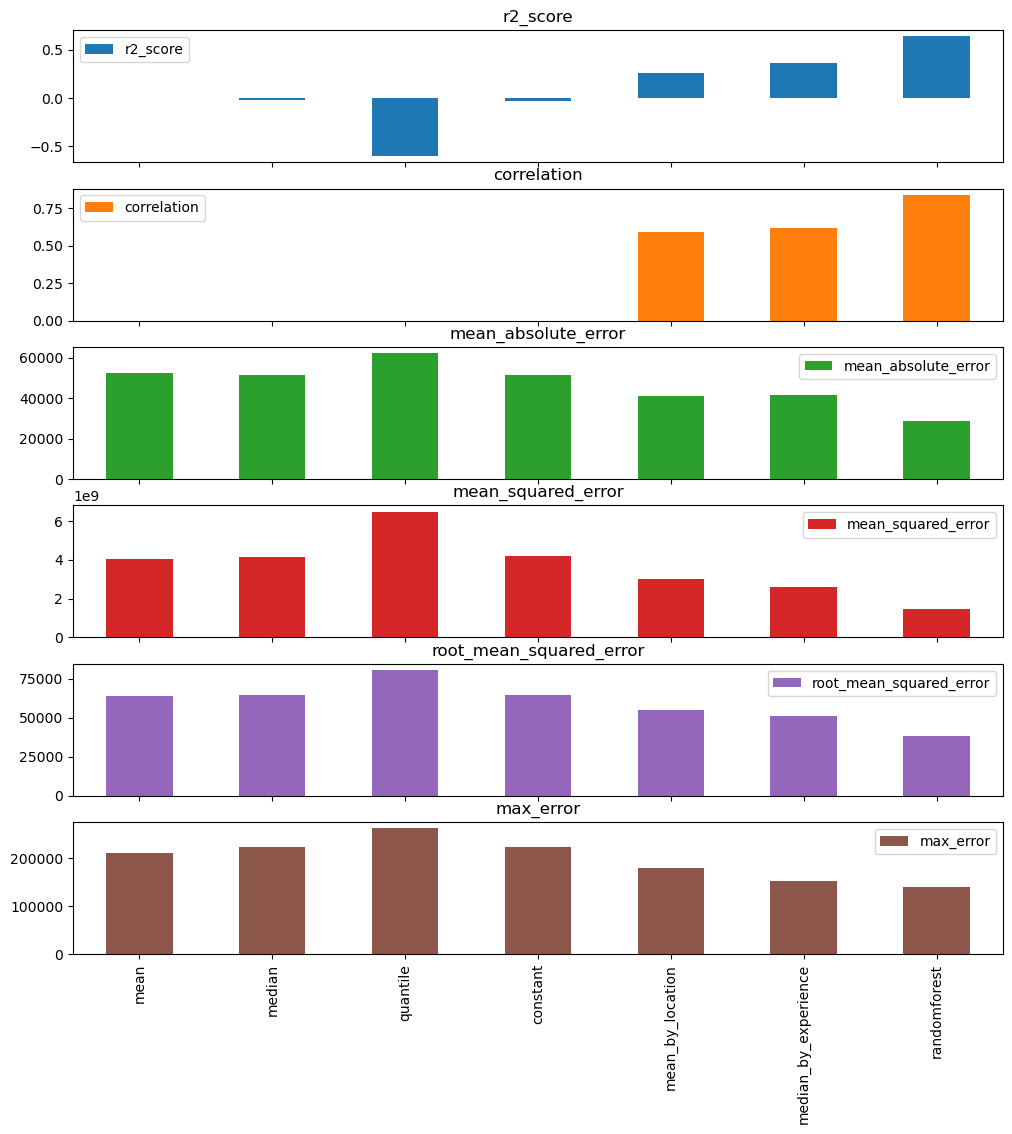

In [166]:
# barplots of metrics
reg_metrics_df.T.plot.bar(subplots=True, figsize=(12,12));

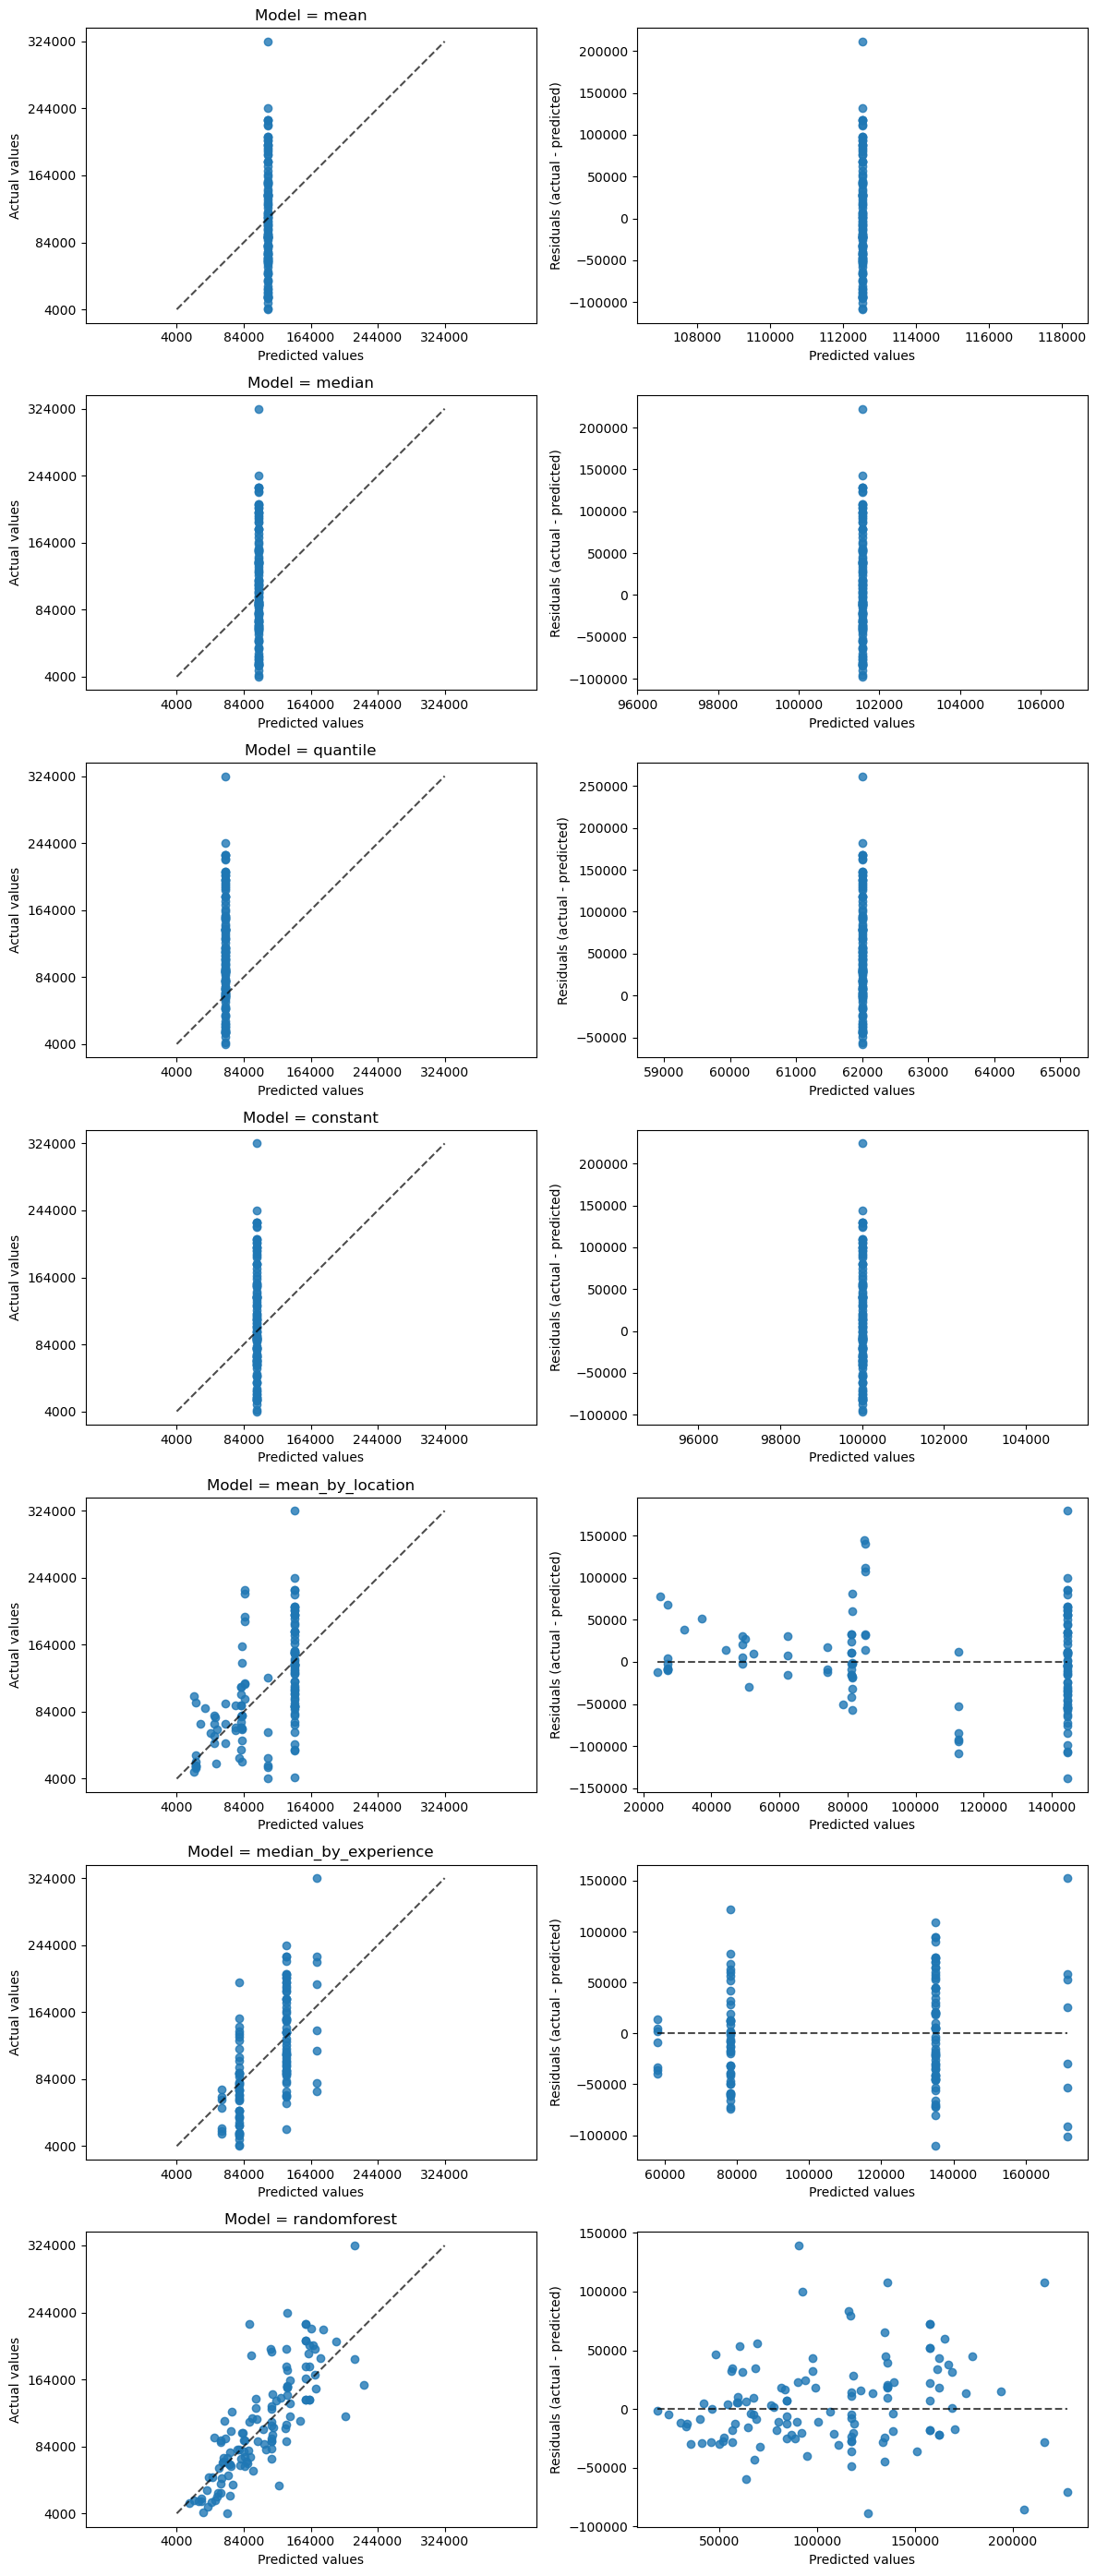

In [181]:
fig, ax = plt.subplots(nrows=reg_baselines_df.shape[1], ncols=2, figsize=(12,4*reg_baselines_df.shape[1]))
for i, col in enumerate(reg_baselines_df.columns):
    PredictionErrorDisplay.from_predictions(y_true=y_test.values, y_pred=reg_baselines_df[col], kind='actual_vs_predicted', ax=ax[i, 0])
    PredictionErrorDisplay.from_predictions(y_true=y_test.values, y_pred=reg_baselines_df[col], kind='residual_vs_predicted', ax=ax[i, 1])
    ax[i, 0].set_title(f'Model = {col}')
fig.tight_layout();